"""

@Author: Girish</br>
@Date: 2024-10-04</br>
@Last Modified by: Girish</br>
@Last Modified time: 2024-10-04</br>
@Title: Weather a person can make >50k or not using KNN</br>

"""

        Importing the Necessary Modules

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

        Loading the Data

In [92]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv('classification_2.csv', header=None, names=columns)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


        Properties Of Dataset

In [93]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


        Handling missing values (replace '?' with NaN and drop missing)

In [94]:
df.replace(' ?', np.nan, inplace=True)

In [95]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [96]:
# # Step 2: Visualize outliers with a box plot for the relevant numeric columns
# numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# # Initial box plot to visualize outliers
# plt.figure(figsize=(15, 10))
# df[numeric_columns].boxplot()
# plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
# plt.xticks(rotation=45)
# plt.show()
# # # Step 3: Remove outliers using IQR method
# # Q1 = df[numeric_columns].quantile(0.25)
# # Q3 = df[numeric_columns].quantile(0.75)
# # IQR = Q3 - Q1

# # # Filter out rows with outliers
# # df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
# # plt.figure(figsize=(15, 10))
# # df[numeric_columns].boxplot()
# # plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
# # plt.xticks(rotation=45)
# # plt.show()


In [97]:

df.dropna(inplace=True)

        Encoding Categorical Features

In [98]:
# df = pd.get_dummies(df, columns=[
#     'workclass', 
#     'education', 
#     'marital-status', 
#     'occupation', 
#     'relationship', 
#     'race', 
#     'sex', 
#     'native-country'], 
#     drop_first=True  # Avoid dummy variable trap
# )

# # Specify the numeric columns to scale
# numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# # Initialize the scaler and fit-transform the numeric columns
# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # Splitting data into features and target
#0 X = df.drop('income', axis=1)  # Features
# y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Convert target variable to binary

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
     df[column] = label_encoder.fit_transform(df[column])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


        Feature Scaling

In [100]:
scaler = StandardScaler()
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.042796,5,-1.062722,9,1.128918,4,0,1,4,1,0.146092,-0.218586,-0.077734,38,0
1,0.880288,4,-1.007871,9,1.128918,2,3,0,4,1,-0.147445,-0.218586,-2.331531,38,0
2,-0.033340,2,0.244693,11,-0.439738,0,5,1,4,1,-0.147445,-0.218586,-0.077734,38,0
3,1.108695,2,0.425240,1,-1.224066,2,5,0,2,1,-0.147445,-0.218586,-0.077734,38,0
4,-0.794697,2,1.406658,9,1.128918,2,9,5,2,0,-0.147445,-0.218586,-0.077734,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870832,2,0.638972,7,0.736754,2,12,5,4,0,-0.147445,-0.218586,-0.244682,38,0
32557,0.118931,2,-0.335252,11,-0.439738,2,6,0,4,1,-0.147445,-0.218586,-0.077734,38,1
32558,1.489374,2,-0.358575,11,-0.439738,6,0,4,4,0,-0.147445,-0.218586,-0.077734,38,0
32559,-1.251511,2,0.110705,11,-0.439738,4,0,3,4,1,-0.147445,-0.218586,-1.747213,38,0


        Correlation heatmap

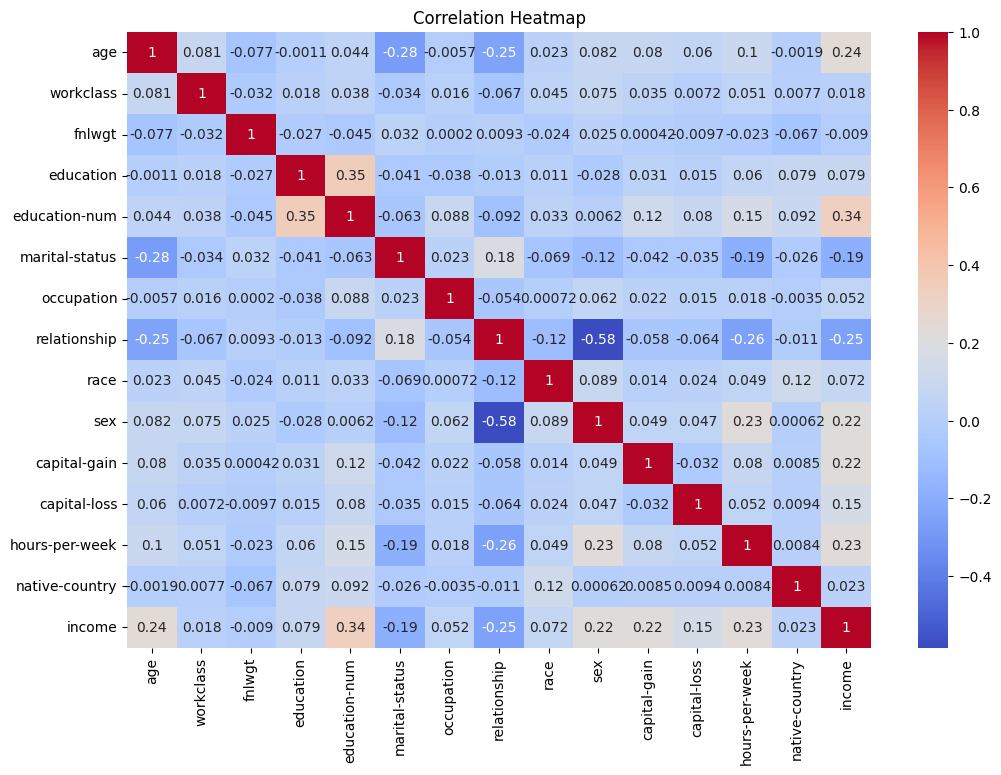

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

        Splitting data into features and target

In [111]:

X = df.drop('income', axis=1)
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: income, Length: 30162, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

        Training the Model

In [106]:

knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

        Predicting Values for X_test

In [107]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

        Confusion Matrix

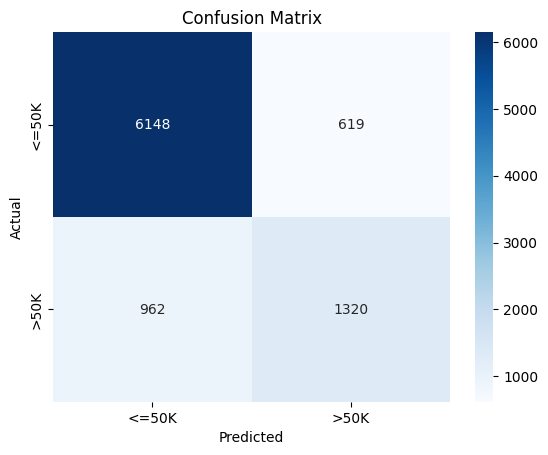

In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6767
           1       0.68      0.58      0.63      2282

    accuracy                           0.83      9049
   macro avg       0.77      0.74      0.76      9049
weighted avg       0.82      0.83      0.82      9049



        Plotting ROC Curve

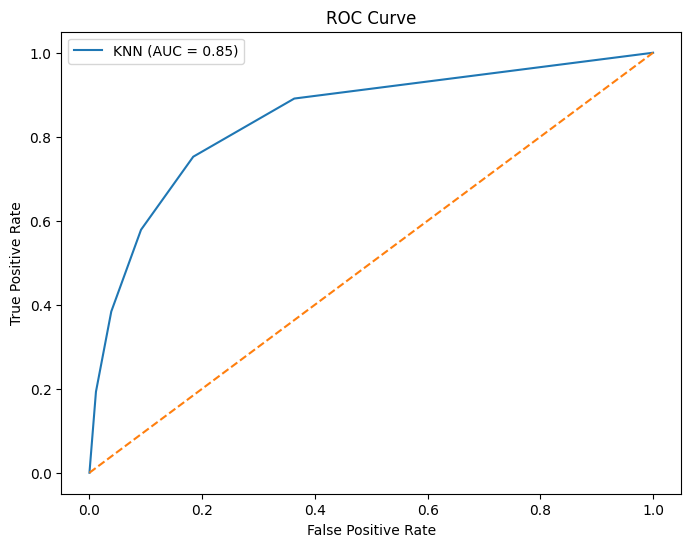

In [110]:
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()